<a href="https://colab.research.google.com/github/ImronRosada/Data_Science/blob/main/Churn_Analysis_ImronRosada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMRON ROSADA<BR>
DATA SCIENCE<BR>
CHURN ANALYSIS

## `DATA UNDERSTANDING`

Mengeksplorasi data untuk mendapatkan wawasan awal serta memastikan kualitas data.

Memprediksi apakah pelanggan akan berhenti berlangganan (`Churn`) di sebuah bank digital di Eropa berdasarkan berbagai variabel yang mempengaruhi keputusan pelanggan dalam menggunakan layanan.

**Deskripsi Variabel**  

Dataset memiliki **10.000** entri dan **14** kolom, termasuk:

| Nama Kolom        | Deskripsi |
|-------------------|-----------|
| **RowNumber**     | Nomor urut data dalam dataset |
| **CustomerId**    | ID unik pelanggan |
| **Surname**       | Nama belakang pelanggan |
| **CreditScore**   | Skor kredit pelanggan |
| **Geography**     | Negara tempat pelanggan tinggal |
| **Gender**        | Jenis kelamin pelanggan |
| **Age**           | Usia pelanggan |
| **Tenure**        | Lama berlangganan pelanggan dalam tahun |
| **Balance**       | Saldo akun pelanggan |
| **NumOfProducts** | Jumlah produk bank yang digunakan pelanggan |
| **HasCrCard**     | Indikator apakah pelanggan memiliki kartu kredit (1 = Ya, 0 = Tidak) |
| **IsActiveMember** | Indikator apakah pelanggan merupakan anggota aktif (1 = Ya, 0 = Tidak) |
| **EstimatedSalary** | Perkiraan gaji pelanggan |
| **Exited**        | Indikator apakah pelanggan berhenti berlangganan (1 = Ya, 0 = Tidak) (`variabel target`) |

Variabel **Exited** merupakan target yang akan diprediksi.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# where is your data path
data_path = '/content/drive/My Drive/'

Mounted at /content/drive/


In [ ]:
pd.set_option('display.max_colwidth', None)
file_name = data_path + 'Churn_Modelling.csv'

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_name)
df_churn = df.copy()
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## `DATA PREPARATION`

Langkah-langkah yang dilakukan untuk memastikan data siap digunakan dalam analisis atau pembuatan model.

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- customerID dan RowNumber →  Identifikasi unik, bukan data yang digunakan untuk analisis. Bisa diabaikan atau dihapus jika tidak diperlukan.<br>

Secara keseluruhan, data sudah baik dan tidak ada yang wajib diubah. Semua tipe data sudah sesuai dengan informasi yang disimpan.

In [ ]:
df_churn.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
# Numerik (Int dan Float)
numerik = ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Kategorik
kategorik = ['Surname', 'Geography', 'Gender']

### Duplicate Handling

In [ ]:
len(df_churn.drop_duplicates()) / len(df_churn)

1.0

In [ ]:
duplicates = df_churn[df_churn.duplicated(keep=False)]
print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


Nilai pada tabel `kosong` menandakan sudah tidak ada baris yang duplikat

### Missing Value Handling

In [ ]:
df_churn[df_churn.isna().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
total_rows = len(df_churn)

for column in df_churn.columns:
   # if column != 'customerID':
        missing_count = df_churn[column].isna().sum()
        missing_percentage = (missing_count / total_rows) * 100
        print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'RowNumber' Has 0 missing values (0.00%)
Column 'CustomerId' Has 0 missing values (0.00%)
Column 'Surname' Has 0 missing values (0.00%)
Column 'CreditScore' Has 0 missing values (0.00%)
Column 'Geography' Has 0 missing values (0.00%)
Column 'Gender' Has 0 missing values (0.00%)
Column 'Age' Has 0 missing values (0.00%)
Column 'Tenure' Has 0 missing values (0.00%)
Column 'Balance' Has 0 missing values (0.00%)
Column 'NumOfProducts' Has 0 missing values (0.00%)
Column 'HasCrCard' Has 0 missing values (0.00%)
Column 'IsActiveMember' Has 0 missing values (0.00%)
Column 'EstimatedSalary' Has 0 missing values (0.00%)
Column 'Exited' Has 0 missing values (0.00%)


Missing values `0.00%` yang berarti tidak ada nilai yang hilang di dalam dataset

### Outlier Handling


In [ ]:
from scipy import stats
def check_plot(df_churn, variable):

    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_churn[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df_churn[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df_churn[variable])
    plt.title('Boxplot')
    plt.show()

In [ ]:
print(numerik)

['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


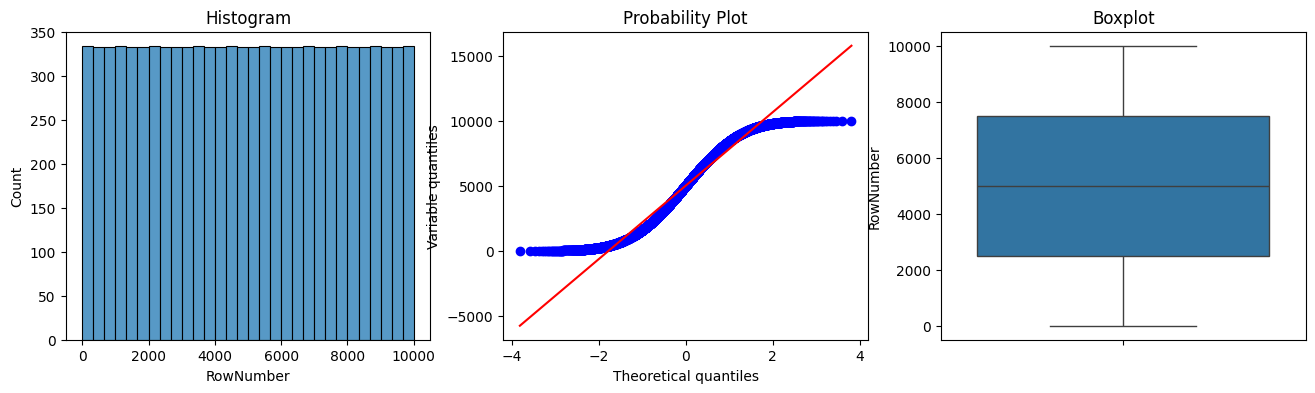

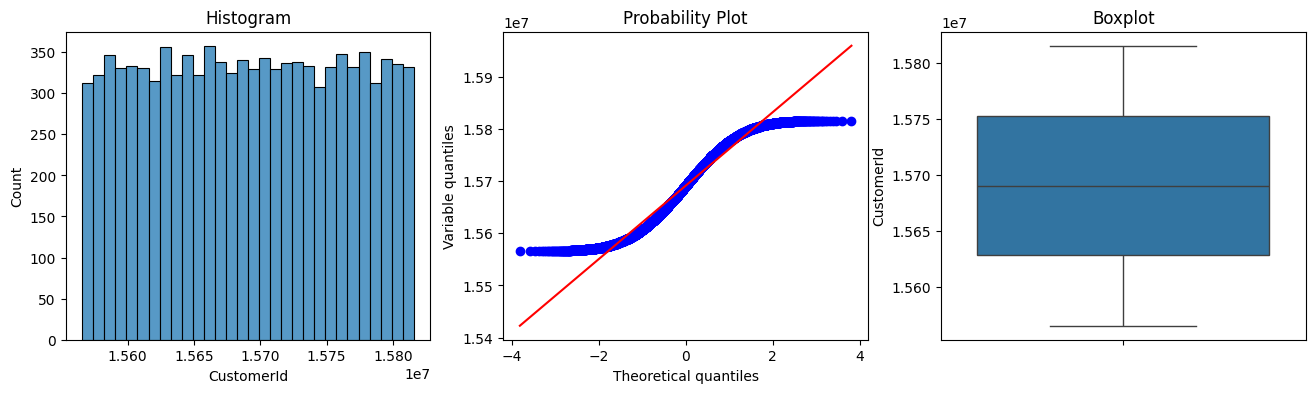

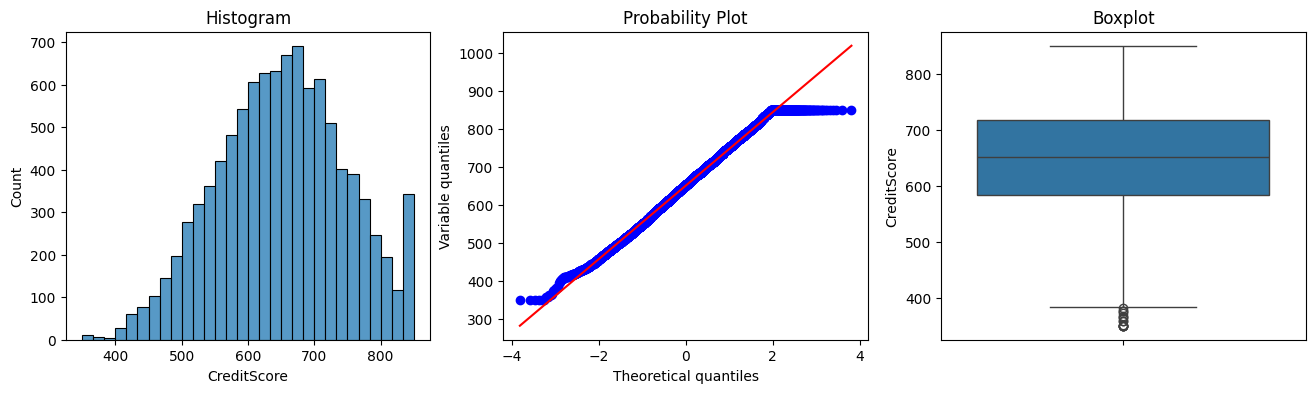

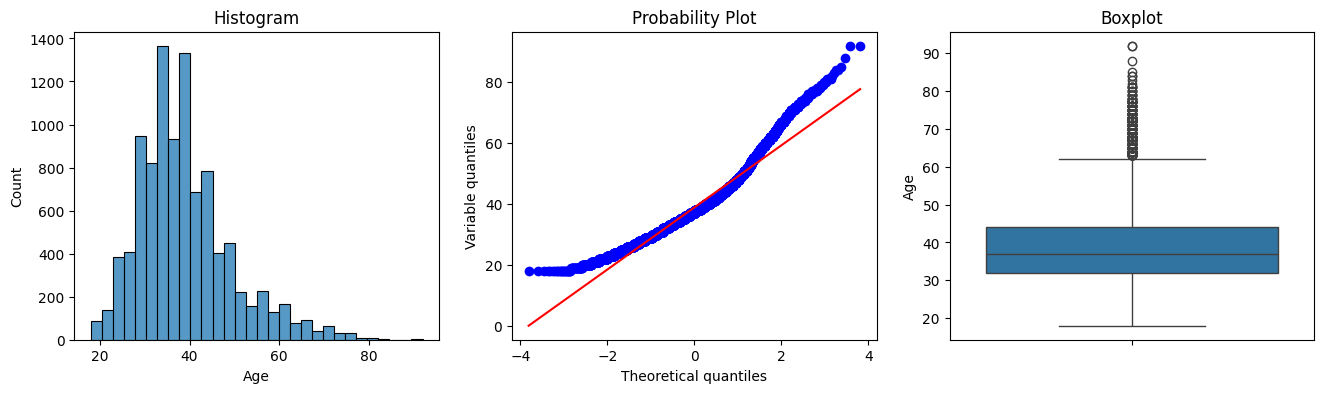

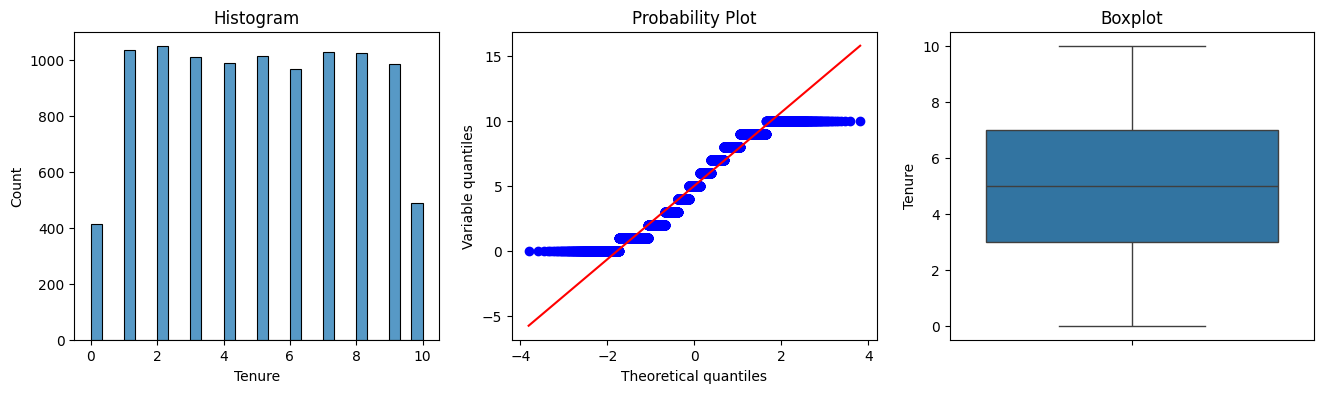

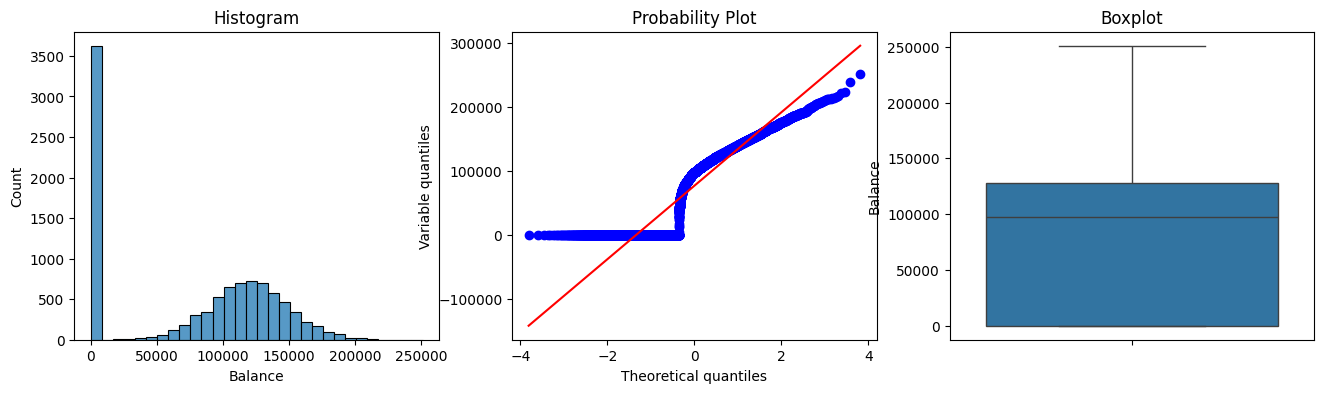

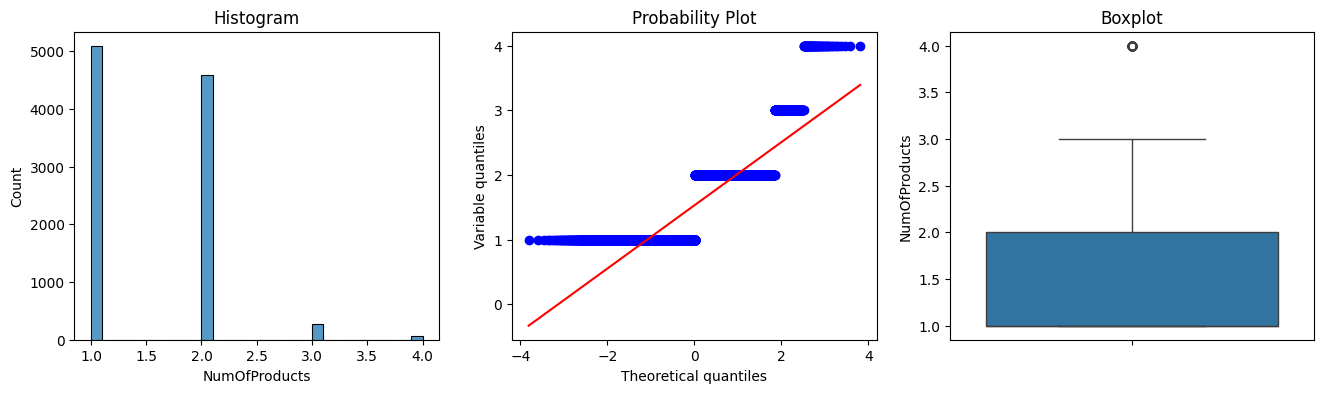

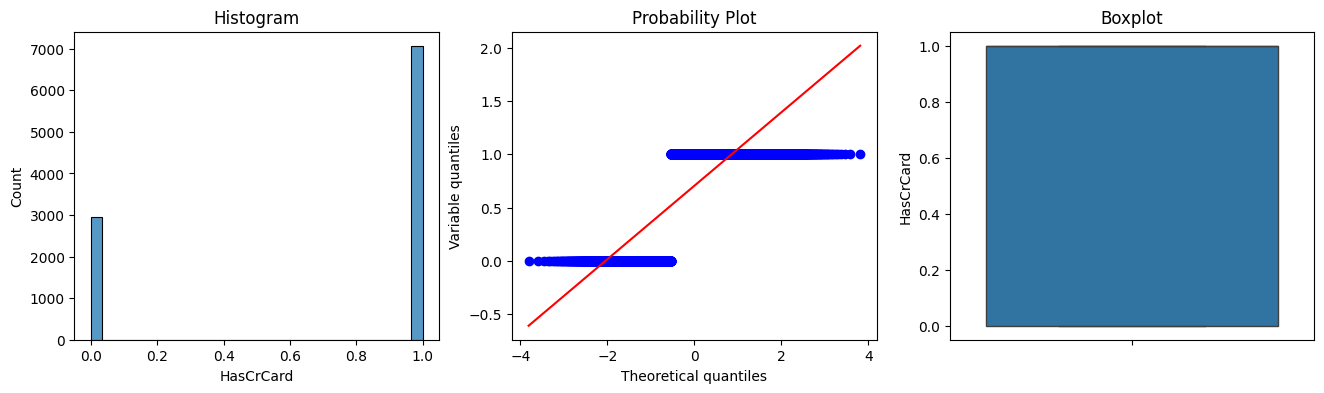

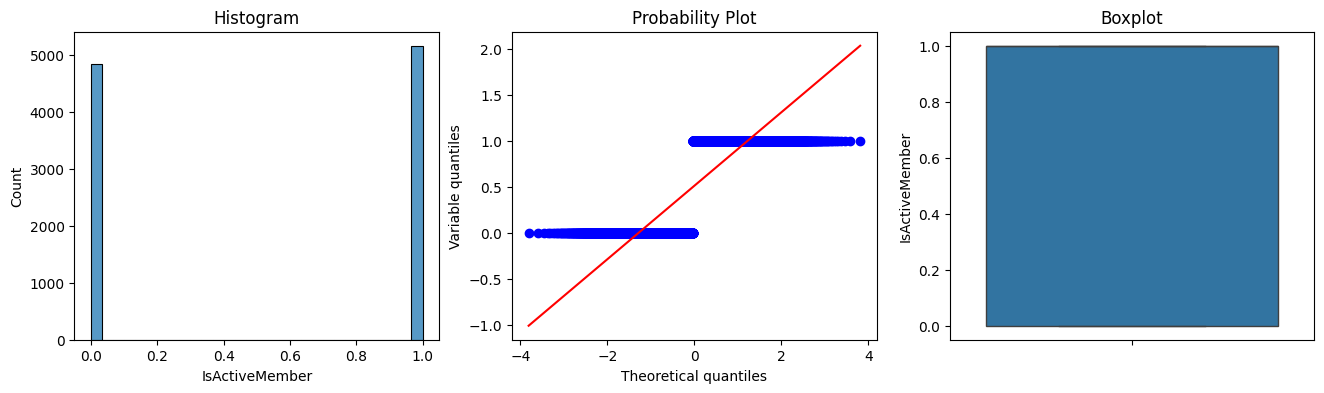

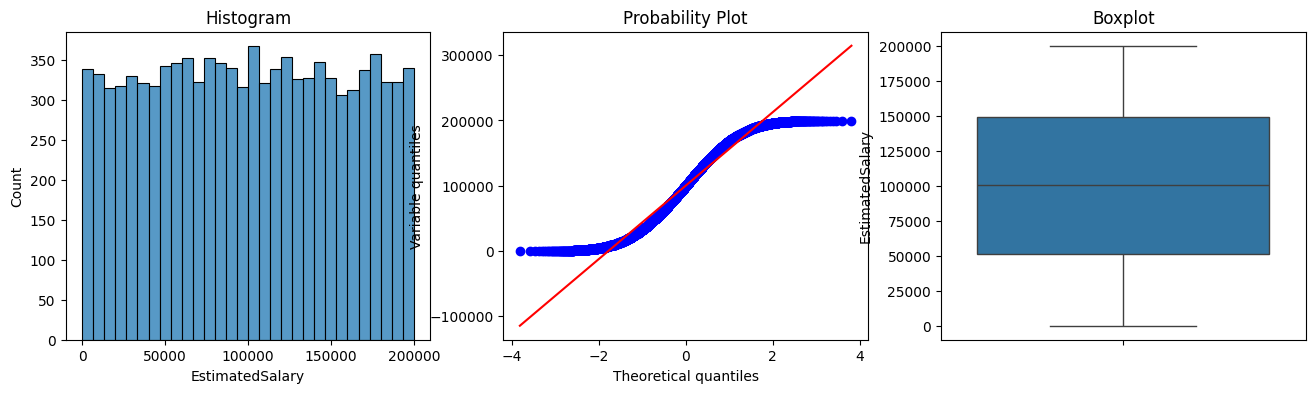

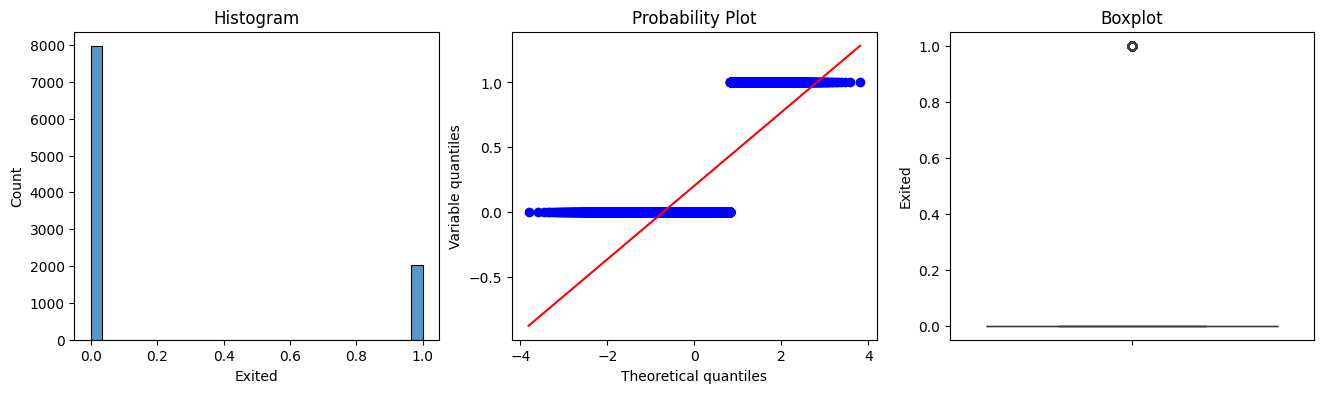

In [ ]:
# Memvisualisasikan outlier
for kolom in ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']:
    df_churn = df_churn.copy()
    check_plot(df_churn, kolom)

In [ ]:
def calc_outliers(df_churn, column):
    q1 = df_churn[column].quantile(0.25)
    q3 = df_churn[column].quantile(0.75)
    iqr = q3 - q1
    upper_fence = q3 + 1.5 * iqr
    lower_fence = q1 - 1.5 * iqr

    print(f"\n[{column}]")
    print(f"Q1: {q1:.2f}, Median: {df_churn[column].median():.2f}, Q3: {q3:.2f}")
    print(f"Upper Fence: {upper_fence:.2f}, Lower Fence: {lower_fence:.2f}")
    print(f"Min: {df_churn[column].min():.2f}, Max: {df_churn[column].max():.2f}")

    outliers_upper = df_churn[df_churn[column] > upper_fence][column]
    outliers_lower = df_churn[df_churn[column] < lower_fence][column]

    print(f"Outliers di atas Upper Fence: {list(outliers_upper)}")
    print(f"Outliers di bawah Lower Fence: {list(outliers_lower)}")

# Daftar kolom yang akan dicek
columns_to_check = ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

for col in columns_to_check:
    calc_outliers(df_churn, col)


[RowNumber]
Q1: 2500.75, Median: 5000.50, Q3: 7500.25
Upper Fence: 14999.50, Lower Fence: -4998.50
Min: 1.00, Max: 10000.00
Outliers di atas Upper Fence: []
Outliers di bawah Lower Fence: []

[CustomerId]
Q1: 15628528.25, Median: 15690738.00, Q3: 15753233.75
Upper Fence: 15940292.00, Lower Fence: 15441470.00
Min: 15565701.00, Max: 15815690.00
Outliers di atas Upper Fence: []
Outliers di bawah Lower Fence: []

[CreditScore]
Q1: 584.00, Median: 652.00, Q3: 718.00
Upper Fence: 919.00, Lower Fence: 383.00
Min: 350.00, Max: 850.00
Outliers di atas Upper Fence: []
Outliers di bawah Lower Fence: [376, 376, 363, 359, 350, 350, 358, 351, 365, 367, 350, 350, 382, 373, 350]

[Age]
Q1: 32.00, Median: 37.00, Q3: 44.00
Upper Fence: 62.00, Lower Fence: 14.00
Min: 18.00, Max: 92.00
Outliers di atas Upper Fence: [66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 75, 66, 66, 70, 63, 72, 64, 64, 70, 67, 82, 63, 69, 65, 69, 64, 65, 74, 67, 66, 67, 63, 70, 71, 72, 67, 74, 76, 66, 63, 66, 68, 67, 63, 71, 66, 69,

In [ ]:
def check_outliers_zscore(df, column, window=100, threshold=2.5):
    df["rolling_mean"] = df[column].rolling(window=window, center=True).mean()
    df["rolling_std"] = df[column].rolling(window=window, center=True).std()

    df["z_score"] = (df[column] - df["rolling_mean"]) / df["rolling_std"]

    outliers = df[(df["z_score"].abs() > threshold)]
    print(f"\n[{column}]")
    print(f"Jumlah outlier: {len(outliers)}")
    print(outliers[[column, "z_score"]].head())

for col in ['Age', 'CreditScore']:
    check_outliers_zscore(df_churn, col)


[Age]
Jumlah outlier: 250
     Age   z_score
58    66  2.671018
85    75  3.599542
104   65  2.736226
158   73  3.905030
181   65  2.765963

[CreditScore]
Jumlah outlier: 38
      CreditScore   z_score
813           421 -2.521346
942           376 -3.151134
1193          363 -2.830311
1405          359 -2.749741
1581          445 -2.525815


Dari data tersebut, outlier ini bukan kesalahan data, tetapi lebih ke nilai ekstrem yang masih masuk akal.
- Umur (Age): Maksimal 92 tahun → Ini masih mungkin terjadi dalam populasi normal.
- Credit Score: Minimal 350 → Skor kredit umumnya berkisar 300-850, jadi ini masih dalam rentang valid.

Sedangkan Kolom **Exited** berisi nilai biner (0 dan 1) dan tidak memiliki outlier dan **NumOfProducts** tidak memiliki pengaruh yang signifikan terhadap distribusi data

In [ ]:
# drop kolom hasil outlier
df_churn = df_churn.drop(columns=['rolling_mean', 'rolling_std', 'z_score'])

### Feature Engineering

In [ ]:
# Membuat fitur baru AgeGroup
df_churn['AgeGroup'] = pd.cut(df_churn['Age'], bins=[0, 30, 50, df_churn['Age'].max()], labels=['Young', 'Adult', 'Senior'])
# Membuat fitur baru Age_ActiveStatus
df_churn['Age_ActiveStatus'] = df_churn['AgeGroup'].astype(str) + '_' + df_churn['IsActiveMember'].map({0: 'Inactive', 1: 'Active'})
# Membuat fitur baru TenureGroup
df_churn['TenureGroup'] = pd.cut(
    df_churn['Tenure'],
    bins=[0, 2, 5, 7, 9, 10],
    labels=['0-2 Years', '3-5 Years', '6-7 Years', '8-9 Years', '≥10 Years'],
    include_lowest=True
)
# Membuat fitur baru BalanceCategory
df_churn['BalanceCategory'] = pd.cut(
    df_churn['Balance'],
    bins=[-1, 0, 50000, 100000, 150000, df_churn['Balance'].max()],
    labels=['No Balance', 'Low Balance', 'Medium Balance', 'High Balance', 'Very High Balance']
)
# Membuat fitur baru CreditScoreGroup
df_churn['CreditScoreGroup'] = pd.cut(
    df_churn['CreditScore'],
    bins=[0, 400, 580, 650, 720, 800, df_churn['CreditScore'].max()],
    labels=['Very Poor', 'Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
)
# Membua fitur baru EstimatedSalaryCategory
df_churn['EstimatedSalaryCategory'] = pd.cut(
    df_churn["EstimatedSalary"],
    bins=[df_churn["EstimatedSalary"].min(), 51002.11, 100193.92, 149388.25, df_churn["EstimatedSalary"].max()],
    labels=["Low", "Medium", "High", "Very High"],
    include_lowest=True
)

**New Features:**<br>
- AgeGroup → Mengelompokkan usia pelanggan menjadi Young (≤30 tahun), Adult (31-50 tahun), dan Senior (>50 tahun) untuk melihat pola churn berdasarkan umur.
- Age_ActiveStatus → Kombinasi AgeGroup dengan status keaktifan (Active/Inactive), memungkinkan analisis dampak umur terhadap loyalitas pelanggan.
- TenureGroup → Mengelompokkan durasi berlangganan ke dalam rentang tertentu untuk memahami churn berdasarkan masa pelanggan.
- BalanceCategory → Mengklasifikasikan saldo pelanggan menjadi No Balance hingga Very High Balance guna melihat hubungan saldo terhadap churn.
- CreditScoreGroup → Mengelompokkan skor kredit pelanggan dari Very Poor hingga Excellent untuk analisis risiko finansial terhadap churn.
- EstimatedSalaryCategory → Mengelompokkan estimasi gaji pelanggan menjadi Low, Medium, High, dan Very High berdasarkan kuartil, memungkinkan analisis dampak pendapatan terhadap kemungkinan churn.

In [ ]:
pd.set_option('display.max_colwidth', None)
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,Age_ActiveStatus,TenureGroup,BalanceCategory,CreditScoreGroup,EstimatedSalaryCategory
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Adult,Adult_Active,0-2 Years,No Balance,Fair,High
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Adult,Adult_Active,0-2 Years,Medium Balance,Fair,High
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Adult,Adult_Inactive,8-9 Years,Very High Balance,Poor,High
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult,Adult_Inactive,0-2 Years,No Balance,Good,Medium
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Adult,Adult_Active,0-2 Years,High Balance,Excellent,Medium


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   RowNumber                10000 non-null  int64   
 1   CustomerId               10000 non-null  int64   
 2   Surname                  10000 non-null  object  
 3   CreditScore              10000 non-null  int64   
 4   Geography                10000 non-null  object  
 5   Gender                   10000 non-null  object  
 6   Age                      10000 non-null  int64   
 7   Tenure                   10000 non-null  int64   
 8   Balance                  10000 non-null  float64 
 9   NumOfProducts            10000 non-null  int64   
 10  HasCrCard                10000 non-null  int64   
 11  IsActiveMember           10000 non-null  int64   
 12  EstimatedSalary          10000 non-null  float64 
 13  Exited                   10000 non-null  int64   
 14  AgeGrou

## `EXPLORATORY DATA ANALYSIS (EDA)`

### Perbandingan Antara Pelanggan yang Churn dan Tidak Churn

In [ ]:
# Change label Exited
df_churn["Exited"] = df_churn["Exited"].replace({0: "No Churn", 1: "Churn"})
print(df_churn[["Exited"]].value_counts())

Exited  
No Churn    7963
Churn       2037
Name: count, dtype: int64


In [ ]:
labels = df_churn['Exited'].value_counts().index
size = df_churn['Exited'].value_counts().values

In [ ]:
fig = px.pie(
    names=labels,
    values=size,
    hole=0.3,
    labels={'name': 'Status Churn'},
    title='Perbandingan Status Churn',
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_layout(
    template='plotly_dark',
    title_font=dict(size=24, family='Arial', color='white'),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    height=600,
    width=1090
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label+value',
    textfont=dict(size=14, color='black')
)
fig.show()

### Hubungan Churn dengan Karakteristik Pelanggan

a. Gender

In [ ]:
data_gender = pd.crosstab(df_churn["Gender"], df_churn["Exited"]).T
data_gender

Gender,Female,Male
Exited,,
Churn,1139,898
No Churn,3404,4559


b. Geografi

In [ ]:
data_geography = pd.crosstab(df["Geography"], df_churn["Exited"]).T
data_geography

Geography,France,Germany,Spain
Exited,,,
Churn,810,814,413
No Churn,4204,1695,2064


c.  Gender dan Geografi

In [ ]:
data_gender_geography = pd.crosstab([df_churn["Gender"], df_churn["Geography"]], df_churn["Exited"]).T
data_gender_geography

Gender    Female                 Male              
Geography France Germany Spain France Germany Spain
Exited                                             
Churn        460     448   231    350     366   182
No Churn    1801     745   858   2403     950  1206

In [ ]:
data_long = data_gender_geography.T.stack().reset_index()
data_long.columns = ['Gender', 'Geography', 'Exited', 'Count']
fig = px.bar(data_long, x='Gender', y='Count', color='Geography', facet_col='Exited',
             barmode='group', text_auto=True, labels={'Count': '', 'Gender': '', 'Exited': '', 'Geography': ''})
fig.update_traces(textposition='outside')
fig.for_each_annotation(lambda a: a.update(text=a.text.replace('=', '')))
fig.update_layout(yaxis=dict(range=[0, 3000]))
fig.show()

### Hubungan Churn dengan Umur dan Lama Berlangganan

a. Kelompok Umur dan Status Keaktifan

In [ ]:
data_agegroup = pd.crosstab(df_churn["AgeGroup"], df_churn["Exited"]).T
data_agegroup

AgeGroup,Young,Adult,Senior
Exited,,,
Churn,148,1326,563
No Churn,1820,5445,698


In [ ]:
data_age_active = pd.crosstab(
    index=df_churn['Exited'],
    columns=[df_churn['AgeGroup'], df_churn['Age_ActiveStatus']]
)
data_age_active

AgeGroup                Young                       Adult                 \
Age_ActiveStatus Young_Active Young_Inactive Adult_Active Adult_Inactive   
Exited                                                                     
Churn                      51             97          482            844   
No Churn                  955            865         2827           2618   

AgeGroup                Senior                  
Age_ActiveStatus Senior_Active Senior_Inactive  
Exited                                          
Churn                      202             361  
No Churn                   634              64

In [ ]:
data_long = data_age_active.T.stack().reset_index()
data_long.columns = ['AgeGroup', 'Age_ActiveStatus', 'Exited', 'Count']
fig = px.pie(data_long, names='Age_ActiveStatus', values='Count', facet_col='Exited',
             title='Distribusi Churn Berdasarkan Keaktifan dan Usia', labels={'Count': '', 'Age_ActiveStatus': '', 'Exited': ''})
fig.for_each_annotation(lambda a: a.update(text=a.text.replace('=', '')))
fig.show()

b. Lama Berlangganan (Tenure)

In [ ]:
data_tenure = pd.crosstab(df_churn["Tenure"], df_churn["Exited"]).T
data_tenure

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
Churn,95,232,201,213,203,209,196,177,197,213,101
No Churn,318,803,847,796,786,803,771,851,828,771,389


In [ ]:
data_tenure_group = df_churn.groupby(["TenureGroup", "Exited"], observed=True).size().unstack().T
data_tenure_group

TenureGroup,0-2 Years,3-5 Years,6-7 Years,8-9 Years,≥10 Years
Exited,,,,,
Churn,528,625,373,410,101
No Churn,1968,2385,1622,1599,389


In [ ]:
data_long = data_tenure_group.T.stack().reset_index()
data_long.columns = ['TenureGroup', 'Exited', 'Count']

fig = px.scatter(data_long, x='TenureGroup', y='Exited', size='Count', color='Exited',
                 title='Distribusi Churn Berdasarkan Kelompok Tenure',
                 labels={'TenureGroup': '', 'Exited': '', 'Count': ''},
                 color_discrete_map={0: 'lightblue', 1: 'salmon'})
fig.update_traces(marker=dict(sizemode='area', line=dict(width=1, color='DarkSlateGrey')))
fig.show()

### Hubungan Churn dengan Faktor Finansial

a. Kategori Saldo (Balance)

In [ ]:
data_balance = pd.crosstab(df_churn["BalanceCategory"], df_churn["Exited"]).T
data_balance

BalanceCategory,No Balance,Low Balance,Medium Balance,High Balance,Very High Balance
Exited,,,,,
Churn,500,26,300,987,224
No Churn,3117,49,1209,2843,745


In [ ]:
data_long = data_balance.T.stack().reset_index()
data_long.columns = ['BalanceCategory', 'Exited', 'Count']
fig = px.pie(data_long, names='BalanceCategory', values='Count', facet_col='Exited', hole=0.4,
             title='Distribusi Churn Berdasarkan Kategori Balance', labels={'BalanceCategory': 'Kategori Balance', 'Exited': '', 'Count': 'Jumlah'},
             color='BalanceCategory',category_orders={'BalanceCategory': sorted(data_long['BalanceCategory'].unique())})
fig.for_each_annotation(lambda a: a.update(text=a.text.replace('=', '')))
fig.show()

b. Skor Kredit (Credit Score Group)

In [ ]:
data_credit = df_churn.groupby(["CreditScoreGroup", "Exited"], observed=False).size().unstack().T
data_credit

CreditScoreGroup,Very Poor,Poor,Fair,Good,Very Good,Excellent
Exited,,,,,,
Churn,19,511,527,494,359,127
No Churn,0,1863,2017,2161,1404,518


In [ ]:
data_long = data_credit.T.stack().reset_index()
data_long.columns = ['CreditScoreGroup', 'Exited', 'Count']
fig = px.scatter(data_long, x='CreditScoreGroup', y='Count', color='Exited', size='Count', title='Distribusi Churn Berdasarkan Kelompok Credit Score',
                 labels={'CreditScoreGroup': '', 'Exited': '', 'Count': ''}, color_discrete_map={0: 'lightblue', 1: 'salmon'})

fig.update_traces(marker=dict(sizemode='area', line=dict(width=2, color='DarkSlateGrey')))
for credit_score in data_long['CreditScoreGroup'].unique():
    subset = data_long[data_long['CreditScoreGroup'] == credit_score]
    fig.add_shape(type='line', x0=credit_score, x1=credit_score, y0=0, y1=subset['Count'].max(), line=dict(color='grey', width=1))
fig.show()

### Hubungan Churn dengan Faktor Keuangan dan Keaktifan

a. Kredit Skor dan Jumlah Produk Bank yang Digunakan

In [ ]:
skor_jumlah_produk = pd.crosstab(
    index=[df_churn["CreditScore"], df_churn["NumOfProducts"]], columns=df_churn["Exited"])
skor_jumlah_produk.T

CreditScore   350    351 358 359 363 365 367 373 376    382 383 386 395 399  \
NumOfProducts   1  2   1   3   1   3   1   1   1   1  4   1   1   1   1   1   
Exited                                                                        
Churn           4  1   1   1   1   1   1   1   1   1  1   1   1   1   1   1   
No Churn        0  0   0   0   0   0   0   0   0   0  0   0   0   0   0   0   

CreditScore   401 404 405    407 408    410    411    412 413 414    415     \
NumOfProducts   1   1   1  2   1   1  2   1  2   1  2   2   2   1  2   1  3   
Exited                                                                        
Churn           1   1   1  0   1   1  0   1  0   0  0   0   0   1  0   0  1   
No Churn        0   0   0  1   0   0  1   1  1   2  2   1   3   0  1   2  0   

CreditScore   416    417 418    419 420    421       422    423 424 425 426  \
NumOfProducts   1  2   2   1  2   1   1  2   1  2  3   1  2   1   1   2   2   
Exited                                                                        
Churn           0  0   0   1  0   0   2  0   0  0  1   0  0   1   0   1   0   
No Churn        1  3   1   3  2   1   0  1   1  1  0   2  2   0   1   3   2   

CreditScore   427    428    429    430    431    432    433    434    435     \
NumOfProducts   1  2   1  2   1  2   1  2   1  2   1  2   1  2   1  2   1  2   
Exited                                                                         
Churn           0  0   0  1   0  0   2  1   1  0   2  0   0  0   1  2   2  0   
No Churn        3  3   1  1   2  2   4  2   2  2   0  3   2  1   3  0   2  1   

CreditScore   436 437    438    439       440 441 442 443    444    445     \
NumOfProducts   2   1  2   1  2   1  2  4   2   1   2   1  2   1  2   1  2   
Exited                                                                       
Churn           1   1  0   2  0   0  0  1   0   0   0   4  0   1  1   2  0   
No Churn        1   3  2   2  2   4  2  0   1   1   1   2  2   2  2   3  7   

CreditScore   446    447       448 449    450    451    452    453       454  \
NumOfProducts   1  2   1  2  4   2   1  2   1  2   1  2   1  2   1  2  3   1   
Exited                                                                         
Churn           1  0   0  1  1   0   0  0   0  0   0  0   0  0   2  0  1   1   
No Churn        3  1   2  0  0   2   2  4   2  2   2  3   5  5   2  1  0   2   

CreditScore      455       456    457       458    459    460 461    462     \
NumOfProducts  2   1  2  3   1  2   1  2  3   1  2   1  2   2   1  2   1  2   
Exited                                                                        
Churn          0   0  0  0   0  1   0  0  1   0  0   2  1   2   1  0   0  0   
No Churn       1   2  1  1   4  0   3  3  0   2  5   2  0   2   4  3   1  3   

CreditScore   463    464    465    466       467    468       469       470  \
NumOfProducts   1  2   1  2   1  2   1  2  3   1  2   1  2  3   1  2  3   1   
Exited                                                                        
Churn           0  0   0  0   2  0   2  1  1   1  1   0  0  1   2  0  1   0   
No Churn        2  2   5  2   3  4   4  2  0   0  2   5  5  0   3  1  0   4   

CreditScore      471    472    473    474    475    476    477    478    479  \
NumOfProducts  2   1  2   1  2   1  2   1  2   1  2   1  2   1  2   1  2   1   
Exited                                                                         
Churn          0   0  0   0  0   0  1   1  1   3  1   2  0   1  3   2  1   4   
No Churn       5   2  5   3  5   3  4   2  5   1  1   4  2   6  3   2  2   7   

CreditScore         480    481       482    483    484       485    486     \
NumOfProducts  2  3   1  2   1  2  3   1  2   1  2   1  2  3   1  2   1  2   
Exited                                                                       
Churn          0  1   3  0   1  0  1   2  0   2  0   1  0  1   1  0   0  1   
No Churn       5  0   3  3   4  4  0   3  1   2  3   4  5  0   6  5   5  3   

CreditScore   487    488    489    

In [ ]:
data_long = skor_jumlah_produk.stack().reset_index()
data_long.columns = ['CreditScore', 'NumOfProducts', 'Exited', 'Count']

fig = px.histogram(data_long, x='CreditScore', y='Count', color='Exited', facet_col='NumOfProducts',
                   labels={'CreditScore': 'CreditScore', 'Count': 'Count', 'Exited': '', 'NumOfProducts': 'NumOfProducts'},
                   title='Distribusi Credit Score Berdasarkan Jumlah Produk Bank yang Digunakan', nbins=20, barmode='overlay', color_discrete_map={0: 'lightblue', 1: 'salmon'})
fig.update_yaxes(title_text='')
fig.update_layout(bargap=0.1)
fig.show()

b. Kartu Kredit, Keanggotaan Aktif, dan Kategori Gaji

In [ ]:
estimated_salary_counts = df_churn['EstimatedSalary'].value_counts().to_frame().T
estimated_salary_counts

EstimatedSalary,24924.92,101348.88,55313.44,72500.68,182692.80,4993.94,124964.82,161971.42,39488.04,187811.71,121505.61,184514.01,121311.12,12873.39,157238.05,123242.11,184399.76,57323.18,89874.82,31422.69,18988.58,19842.18,62627.55,197266.58,199992.48,16403.41,78854.57,189310.27,78088.17,103305.01,143301.49,116124.28,142730.27,58076.52,186123.57,29664.45,147963.07,38466.39,68293.93,10288.24,179446.31,118929.64,115037.67,187280.51,183540.22,28531.81,42730.12,104721.50,65219.85,70563.90,141453.62,139435.12,170347.10,131553.82,138344.70,169894.40,9770.97,74176.71,144880.81,101168.30,71672.86,61326.43,93151.77,6554.97,38570.13,131048.36,127068.92,51721.52,46156.87,192950.60,180932.46,19596.73,46786.92,175820.91,198208.00,55362.45,47675.29,119313.74,3729.89,186275.70,186785.01,99800.87,40250.82,83335.78,48382.40,165990.44,9002.80,188156.34,184259.60,109394.62,57817.84,144660.42,163112.90,136301.10,36176.63,65769.30,174123.16,159553.27,163295.87,168034.90,193135.25,100687.67,111442.71,136902.01,105732.90,35884.91,73489.15,110114.19,40145.28,146398.51,160526.36,173516.71,88396.60,185821.41,108098.28,162267.91,161304.68,190155.13,185144.08,136491.72,140130.22,17536.82,53157.16,143585.29,72402.00,39891.84,89804.83,35593.18,61450.96,58268.20,101778.90,185123.09,119927.81,195033.07,86480.29,198766.61,29937.75,86634.30,181794.86,161428.25,8673.43,125912.77,151349.35,67972.45,71139.31,86350.97,118648.12,100995.11,147100.72,155495.63,196875.87,63176.77,105221.76,131924.38,23132.73,112668.06,98463.99,38798.79,56908.41,129569.92,55972.56,59497.01,181928.25,102517.83,88827.67,14161.30,184474.72,128745.69,94912.78,73069.59,136602.80,150093.32,168186.11,146230.63,79314.10,14357.00,142492.04,150548.50,120138.27,67508.01,12156.93,65089.38,62370.67,18826.34,3342.62,178626.07,32845.32,134732.99,106095.82,57380.13,25951.91,69414.13,96123.72,119425.94,77965.67,194767.30,131718.12,188037.76,33450.11,19658.43,104678.78,143203.78,6975.02,153771.80,85902.39,52710.70,10672.54,17034.37,131304.45,172576.43,99019.65,190160.04,3025.49,34689.77,23548.45,176763.27,102402.91,96881.32,10627.21,122268.75,65482.94,146134.68,123300.38,122925.40,127744.02,118319.50,17104.00,164608.98,152108.47,23399.58,94711.43,7312.25,41876.98,91098.76,62368.33,2746.41,61666.87,47298.95,45443.68,198715.27,115611.97,40333.94,105997.25,134851.12,196574.48,77742.38,111097.39,48201.64,135096.78,15650.89,34097.22,174822.74,85937.52,69850.04,170360.11,119924.80,4554.67,10928.30,91346.03,139844.04,105052.90,144366.83,19605.18,80483.76,154344.00,93503.02,153036.97,98029.58,193018.71,60810.64,87071.18,164064.44,49185.57,34436.83,126761.20,76642.68,126722.57,176883.42,122960.98,9607.10,152643.48,95551.22,141860.62,52301.15,88279.60,29388.02,193408.43,58632.37,191076.22,645.61,144390.75,193580.32,195896.59,184017.98,144134.64,102806.60,157549.60,173386.95,82782.08,187758.50,176547.80,56585.20,125762.95,113868.40,24780.13,120259.41,175398.34,86767.48,71216.60,85240.61,160529.71,153295.00,148098.95,9658.41,54628.11,159800.16,14379.01,74322.85,189016.24,136435.75,78488.39,113695.99,150835.21,82393.08,158891.79,160523.33,180595.02,16618.76,79919.97,186489.14,51999.50,135995.58,147661.47,180134.88,52861.89,91001.02,20555.21,123164.97,143463.28,92131.54,77178.42,193650.16,35896.75,84760.70,149418.41,46253.65,86609.37,91943.94,128892.36,44830.71,84508.44,121299.14,144593.30,178752.73,103608.06,32262.28,128052.29,181419.29,109783.29,181879.56,74260.16,49865.04,167564.82,94148.30,41816.49,179066.58,109184.24,199841.32,83617.17,84863.85,114775.53,186418.85,15523.09,152499.80,131283.60,77414.45,63236.97,108645.85,95153.24,136079.64,98273.01,113505.93,52525.15,194617.98,152541.89,142903.44,182257.61,135431.72,175697.87,59061.25,10662.58,72073.72,86776.38,94187.47,115779.48,93228.86,148704.77,150475.14,40914.32,38587.70,171260.66,145900.89,73856.28,152298.28,99828.45,34743.98,121189.30,129660.59,145477.36,151822.66,17298.72,10883.52,19302.78,54340.24,17376.57,199428.19,16922.28,178291.89,152290.28,126809.1

In [ ]:
df_churn.groupby('EstimatedSalaryCategory', observed=True)['EstimatedSalary'].describe()

,count,mean,std,min,25%,50%,75%,max
EstimatedSalaryCategory,,,,,,,,
Low,2500.0,25407.102916,14846.626000,11.58,12483.5175,25676.975,38136.8300,50974.57
Medium,2500.0,75420.523720,14097.756442,51011.29,63074.9900,75715.345,87412.3650,100187.43
High,2500.0,124553.795324,14304.606622,100200.40,112305.6275,124602.165,136989.0850,149384.43
Very High,2500.0,174979.537564,14560.541482,149399.70,162702.1750,175169.805,187722.3175,199992.48


In [ ]:
data_crcard_active_salary = pd.crosstab([df_churn["HasCrCard"], df_churn["IsActiveMember"], df_churn["EstimatedSalaryCategory"]], df_churn["Exited"]).T
data_crcard_active_salary.columns = data_crcard_active_salary.columns.set_levels(["No", "Yes"], level=0)
data_crcard_active_salary.columns = data_crcard_active_salary.columns.set_levels(["Inactive", "Active"], level=1)
data_crcard_active_salary

HasCrCard                     No                                           \
IsActiveMember          Inactive                       Active               
EstimatedSalaryCategory      Low Medium High Very High    Low Medium High   
Exited                                                                      
Churn                         81     94   76       109     59     54   73   
No Churn                     263    272  254       252    320    306  343   

HasCrCard                              Yes                               \
IsActiveMember                    Inactive                       Active   
EstimatedSalaryCategory Very High      Low Medium High Very High    Low   
Exited                                                                    
Churn                          67      234    228  239       241    126   
No Churn                      322      624    616  637       629    793   

HasCrCard                                      
IsActiveMember                                 
EstimatedSalaryCategory Medium High Very High  
Exited                                         
Churn                      119  115       122  
No Churn                   811  763       758

In [ ]:
data_long = data_crcard_active_salary.stack(level=[0, 1, 2], future_stack=True).reset_index()
data_long.columns = ['Exited', 'HasCrCard', 'IsActiveMember', 'EstimatedSalaryCategory', 'Count']
fig = px.bar(data_long,
             x='EstimatedSalaryCategory', y='Count', color='Exited', facet_row='HasCrCard', facet_col='IsActiveMember', barmode='group', text_auto=True,
             title='Distribusi Churn Berdasarkan Kartu Kredit, Keaktifan, dan Kategori Gaji', color_discrete_map={"Churn": 'salmon', "No Churn": 'lightblue'})
fig.for_each_annotation(lambda a: a.update(text=a.text.replace('=', '')))
fig.update_yaxes(title_text='')
fig.show()

In [ ]:
# Back to original value
df_churn["Exited"] = df_churn["Exited"].astype(str).replace({"No Churn": "0", "Churn": "1"}).astype("int64")

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   RowNumber                10000 non-null  int64   
 1   CustomerId               10000 non-null  int64   
 2   Surname                  10000 non-null  object  
 3   CreditScore              10000 non-null  int64   
 4   Geography                10000 non-null  object  
 5   Gender                   10000 non-null  object  
 6   Age                      10000 non-null  int64   
 7   Tenure                   10000 non-null  int64   
 8   Balance                  10000 non-null  float64 
 9   NumOfProducts            10000 non-null  int64   
 10  HasCrCard                10000 non-null  int64   
 11  IsActiveMember           10000 non-null  int64   
 12  EstimatedSalary          10000 non-null  float64 
 13  Exited                   10000 non-null  int64   
 14  AgeGrou

## `MODEL PREPARATION`

### Handling Data Categorical

In [ ]:
df_churn.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
# Hapus fitur yang tidak digunakan
df_churn.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

**Observasi**<br>
- RowNumber (Nomor baris, tidak relevan)
- CustomerId (ID pelanggan, tidak berguna untuk prediksi)
- Surname (Nama belakang, tidak berkontribusi terhadap prediksi)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding untuk kategori ordinal
le = LabelEncoder()
label_cols = ['CreditScoreGroup', 'AgeGroup', 'TenureGroup', 'BalanceCategory', 'EstimatedSalaryCategory']

for col in label_cols:
    df_churn[col] = le.fit_transform(df_churn[col])

# One-Hot Encoding untuk kategori nominal
kolom_ohe = ['Geography', 'Gender', 'Age_ActiveStatus']
df_churn = pd.get_dummies(df_churn, columns=kolom_ohe, drop_first=False, dtype=int)

# Susun ulang posisi kolom agar 'Churn' (Exited) ada di akhir
posisi = [col for col in df_churn.columns if col != 'Exited'] + ['Exited']
df_churn = df_churn[posisi]

In [ ]:
df_churn.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,AgeGroup,TenureGroup,BalanceCategory,CreditScoreGroup,EstimatedSalaryCategory,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_ActiveStatus_Adult_Active,Age_ActiveStatus_Adult_Inactive,Age_ActiveStatus_Senior_Active,Age_ActiveStatus_Senior_Inactive,Age_ActiveStatus_Young_Active,Age_ActiveStatus_Young_Inactive,Exited
0,619,42,2,0.00,1,1,1,101348.88,0,0,3,1,0,1,0,0,1,0,1,0,0,0,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,2,1,0,0,0,1,1,0,1,0,0,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,0,3,4,3,0,1,0,0,1,0,0,1,0,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,3,2,2,1,0,0,1,0,0,1,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,2,0,0,1,1,0,1,0,0,0,0,0,0


**Observasi**<br>

- CreditScore → Nilai kredit pelanggan (biasanya antara 300-900), perlu di-scale agar tidak mendominasi fitur lain.
- Age → Usia pelanggan dalam tahun (misalnya 18-80), memiliki skala berbeda dibanding fitur lain.
- Tenure → Lama menjadi nasabah dalam tahun (0-10 tahun), tetapi tetap dalam skala numerik.
- Balance → Saldo akun pelanggan (bisa 0 hingga ratusan ribu), perlu di-scale karena memiliki perbedaan skala yang besar.
- NumOfProducts → Jumlah produk yang dimiliki pelanggan (1-4), tetap perlu di-scale karena bernilai lebih dari dua kategori.
- EstimatedSalary → Pendapatan pelanggan (0 hingga ratusan ribu), perlu di-scale agar model tidak terlalu bergantung pada fitur ini.

### Feature Scaling

Metode feature scaling yang umum digunakan adalah MinMaxScaler dan StandardScaler. Dalam kasus ini, `StandardScaler` dipilih karena data memiliki skala yang berbeda dan kemungkinan ada outlier, sehingga lebih stabil tanpa terlalu dipengaruhi nilai ekstrem.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fitur yang di-scaling
features_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [ ]:
# cek jika ada missing value
display(df_churn[features_to_scale].isnull().sum())

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
EstimatedSalary,0


In [ ]:
# Melakukan scaling
df_churn[features_to_scale] = scaler.fit_transform(df_churn[features_to_scale])

In [ ]:
df_churn.sample(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,AgeGroup,TenureGroup,BalanceCategory,CreditScoreGroup,EstimatedSalaryCategory,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_ActiveStatus_Adult_Active,Age_ActiveStatus_Adult_Inactive,Age_ActiveStatus_Senior_Active,Age_ActiveStatus_Senior_Inactive,Age_ActiveStatus_Young_Active,Age_ActiveStatus_Young_Inactive,Exited
8052,-0.284834,-0.469311,1.378686,-1.225848,-0.911583,1,0,-1.318695,0,3,3,1,1,1,0,0,1,0,0,1,0,0,0,0,0
5877,-1.826504,-1.232140,0.341352,-1.225848,0.807737,0,0,0.911201,2,2,3,3,3,1,0,0,0,1,0,0,0,0,0,1,0


###  Feature Correlation Matrix

In [ ]:
df_churn.describe().fillna(0)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,AgeGroup,TenureGroup,BalanceCategory,CreditScoreGroup,EstimatedSalaryCategory,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_ActiveStatus_Adult_Active,Age_ActiveStatus_Adult_Inactive,Age_ActiveStatus_Senior_Active,Age_ActiveStatus_Senior_Inactive,Age_ActiveStatus_Young_Active,Age_ActiveStatus_Young_Inactive,Exited
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,-4.824585e-16,2.318146e-16,-1.078249e-16,-6.252776e-17,1.634248e-17,0.70550,0.515100,-2.877698e-17,0.519700,1.498700,1.782000,2.212300,1.50000,0.501400,0.250900,0.247700,0.454300,0.545700,0.330900,0.346200,0.083600,0.042500,0.100600,0.09620,0.203700
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.45584,0.499797,1.000050e+00,0.802045,1.202141,1.497164,1.194643,1.11809,0.500023,0.433553,0.431698,0.497932,0.497932,0.470561,0.475782,0.276801,0.201737,0.300813,0.29488,0.402769
min,-3.109504e+00,-1.994969e+00,-1.733315e+00,-1.225848e+00,-9.115835e-01,0.00000,0.000000,-1.740268e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,-6.883586e-01,-6.600185e-01,-6.959818e-01,-1.225848e+00,-9.115835e-01,0.00000,0.000000,-8.535935e-01,0.000000,1.000000,0.000000,1.000000,0.75000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.522218e-02,-1.832505e-01,-4.425957e-03,3.319639e-01,-9.115835e-01,1.00000,1.000000,1.802807e-03,0.000000,1.000000,2.000000,2.000000,1.50000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,6.981094e-01,4.842246e-01,6.871299e-01,8.199205e-01,8.077366e-01,1.00000,1.000000,8.572431e-01,1.000000,2.000000,3.000000,3.000000,2.25000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,2.063884e+00,5.061197e+00,1.724464e+00,2.795323e+00,4.246377e+00,1.00000,1.000000,1.737200e+00,2.000000,4.000000,4.000000,5.000000,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [ ]:
corr = df_churn.corr()

In [ ]:
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,AgeGroup,TenureGroup,BalanceCategory,CreditScoreGroup,EstimatedSalaryCategory,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_ActiveStatus_Adult_Active,Age_ActiveStatus_Adult_Inactive,Age_ActiveStatus_Senior_Active,Age_ActiveStatus_Senior_Inactive,Age_ActiveStatus_Young_Active,Age_ActiveStatus_Young_Inactive,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,0.001945,-0.000123,0.000194,-0.081698,8.559429e-03,-0.008928,0.005538,0.004780,0.002857,-0.002857,0.014731,-0.014973,0.006841,-0.015217,1.328105e-02,-0.008908,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,-0.266841,-0.009511,-0.032365,-0.005204,4.034068e-03,-0.039208,0.046897,-0.001685,0.027544,-0.027544,-0.030807,-0.005617,0.635377,0.359300,-3.944557e-01,-0.381614,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,0.008255,0.968808,0.002215,-0.002350,-7.731829e-04,-0.002848,-0.000567,0.003868,-0.014733,0.014733,-0.021631,0.016693,-0.008832,0.001467,-5.158741e-03,0.020133,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,-0.017122,-0.010031,-0.493008,0.003544,-2.301693e-04,-0.231329,0.401110,-0.134892,-0.012087,0.012087,0.003809,0.003305,-0.005676,0.042507,-1.748977e-02,-0.017320,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,0.007836,0.006135,0.207964,-0.023261,5.382323e-03,0.001230,-0.010419,0.009039,0.021859,-0.021859,0.014458,-0.009596,-0.013198,-0.035230,5.497968e-03,0.023293,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.002056,0.023301,0.003662,-0.007489,-1.471686e-03,0.002467,0.010577,-0.013480,-0.005766,0.005766,-0.005362,0.007175,-0.010937,-0.001998,-1.263956e-03,0.009902,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,0.042669,-0.025934,0.001326,-0.014331,-7.427133e-03,0.003317,-0.020486,0.016732,-0.022544,0.022544,0.682312,-0.749999,0.293049,-0.217142,3.244912e-01,-0.336257,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.001477,0.007979,-0.012123,0.011427,3.913391e-01,-0.003332,0.010297,-0.006482,0.008112,-0.008112,-0.008557,0.013165,-0.017681,-0.003789,1.067866e-02,0.000710,0.012097
AgeGroup,0.001945,-0.266841,0.008255,-0.017122,0.007836,0.002056,0.042669,0.001477,1.000000,0.009154,0.016403,0.004141,-7.750911e-03,0.017013,-0.012059,-0.007596,0.000752,-0.000752,-0.455699,-0.471538,0.180882,0.126171,6.172985e-01,0.602177,-0.061803
TenureGroup,-0.000123,-0.009511,0.968808,-0.010031,0.006135,0.023301,-0.025934,0.007979,0.009154,1.000000,-0.003214,-0.004926,-1.860164e-04,-0.006236,0.001297,0.005920,-0.010124,0.010124,-0.021781,0.015300,-0.005985,0.001259,-3.510167e-03,0.018409,-0.009884


In [ ]:
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale='Blues', title="Correlation Heatmap")
fig.update_layout( template='plotly_dark',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    title_font=dict(size=24, family='Arial', color='white'),
    autosize=True, width=1400,
    height=1200, xaxis=dict(tickangle=45),
    margin=dict(l=50, r=50, t=50, b=50))
fig.update_traces(xgap=1,  ygap=1)
fig.show()

**Observasi**:<br>

- TenureGroup
- Age_ActiveStatus_Adult_Inactive

TenureGroup dan Age_ActiveStatus_Adult_Inactive adalah hasil feature engineering. TenureGroup memiliki korelasi yang sangat tinggi dengan Tenure (0.968), sementara Age_ActiveStatus_Adult_Inactive memiliki korelasi negatif yang tinggi dengan IsActiveMember (-0.749).

In [ ]:
df_churn = df_churn.drop(columns=['TenureGroup', 'Age_ActiveStatus_Adult_Inactive'])

### Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df_churn.drop(columns=['Exited'])
y = df_churn['Exited']

In [ ]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,AgeGroup,BalanceCategory,CreditScoreGroup,EstimatedSalaryCategory,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_ActiveStatus_Adult_Active,Age_ActiveStatus_Senior_Active,Age_ActiveStatus_Senior_Inactive,Age_ActiveStatus_Young_Active,Age_ActiveStatus_Young_Inactive
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,0,3,1,0,1,0,0,1,0,1,0,0,0,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,2,1,0,0,0,1,1,0,1,0,0,0,0


In [ ]:
y.head(2)

,Exited
0,1
1,0


In [ ]:
# Split Training dan Sisanya (Validation + Test) - 80% training, 20% sisanya
X_train, X_test_valid, y_train, y_test_valid = train_test_split(X, y, test_size=0.20, random_state=42)

# Bagi Validation dan Test (masing-masing 10%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test_valid, y_test_valid, test_size=0.50, random_state=42)

`X_test_valid` hanya sebagai langkah sementara, tidak digunakan langsung, membantu memisahkan data validasi dan test. 80% data digunakan untuk training. Dari 20% sisa data, di bagi lagi menjadi: 10% untuk validasi (50% dari 20%), 10% untuk test (50% dari 20%).

In [ ]:
X_train.shape, X_validation.shape, X_test.shape

((8000, 22), (1000, 22), (1000, 22))

In [ ]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'AgeGroup', 'BalanceCategory',
       'CreditScoreGroup', 'EstimatedSalaryCategory', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'Age_ActiveStatus_Adult_Active', 'Age_ActiveStatus_Senior_Active',
       'Age_ActiveStatus_Senior_Inactive', 'Age_ActiveStatus_Young_Active',
       'Age_ActiveStatus_Young_Inactive'],
      dtype='object')

## `MODEL TRAINING`

✅ XGBoost – Dipilih karena kemampuannya yang unggul dalam menangani interaksi fitur yang kompleks dan memberikan akurasi tinggi.<br>
✅ Support Vector Machine (SVM) – Dipilih untuk mengeksplorasi pola non-linear dengan performa optimal setelah Feature Scaling.<br>

Pemilihan model ini didukung oleh Data Preprocessing yang telah dilakukan, seperti Label dan One-Hot Encoding dan Feature Scaling untuk meningkatkan akurasi model.

In [ ]:
# Paket komplit untuk evaluasi model klasifikasi!
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [ ]:
# convert to numpy (array)
X_churn_train = X_train.to_numpy() # data fitur
y_churn_train = y_train.to_numpy().reshape(len(y_train),)# data target

# validasi
X_valid = X_validation.to_numpy()
y_valid = y_validation.to_numpy().reshape(len(y_validation),)

In [ ]:
# === Tuning for XGBoost ===
param_grid_xgb = {
    'n_estimators': [100, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0, 1],
    'scale_pos_weight': [5, 10]
}

In [ ]:
# === Tuning for SVM ===
param_grid_svm = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1],
    'class_weight': ['balanced']
}

In [ ]:
# GridSearchCV untuk XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1)
grid_xgb.fit(X_churn_train, y_churn_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8], 'gamma': [0, 1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 300],
                         'scale_pos_weight': [5, 10], 'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [ ]:
cv_results_xgb = pd.DataFrame(grid_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
cv_results_xgb = cv_results_xgb.sort_values(by='rank_test_score').head(5)
cv_results_xgb

,params,mean_test_score,rank_test_score
12,"{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'scale_pos_weight': 5, 'subsample': 0.8}",0.600202,1
29,"{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'scale_pos_weight': 5, 'subsample': 1.0}",0.600189,2
124,"{'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'scale_pos_weight': 5, 'subsample': 0.8}",0.599459,3
93,"{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'scale_pos_weight': 5, 'subsample': 1.0}",0.599403,4
13,"{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'scale_pos_weight': 5, 'subsample': 1.0}",0.599391,5


In [ ]:
# Best parameters and best score for XGBoost
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best score for XGBoost:", grid_xgb.best_score_)

Best parameters for XGBoost: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'scale_pos_weight': 5, 'subsample': 0.8}
Best score for XGBoost: 0.6002024634130139


In [ ]:
best_xgb_model = grid_xgb.best_estimator_
best_xgb_model.fit(X_churn_train, y_churn_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# GridSearchCV untuk SVM
svm_model = SVC(random_state=42)
grid_svm = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid_svm,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1)
grid_svm.fit(X_churn_train, y_churn_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [1, 10], 'class_weight': ['balanced'],
                         'gamma': [0.01, 0.1], 'kernel': ['linear', 'rbf']},
             scoring='recall', verbose=1)

In [ ]:
cv_results_svm = pd.DataFrame(grid_svm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
cv_results_svm = cv_results_svm.sort_values(by='rank_test_score').head(5)
cv_results_svm

,params,mean_test_score,rank_test_score
5,"{'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}",0.737810,1
3,"{'C': 1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}",0.718971,2
1,"{'C': 1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}",0.705584,3
4,"{'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'linear'}",0.671519,4
6,"{'C': 10, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'linear'}",0.671519,4


In [ ]:
# Best parameters and best score for SVM
print("Best parameters for SVM:", grid_svm.best_params_)
print("Best score for SVM:", grid_svm.best_score_)

Best parameters for SVM: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
Best score for SVM: 0.7378104381347763


In [ ]:
best_svm_model = grid_svm.best_estimator_
best_svm_model.fit(X_churn_train, y_churn_train)

SVC(C=10, class_weight='balanced', gamma=0.01, random_state=42)

### Model Training Evaluation

In [ ]:
# Prediksi Evaluasi Model training XGBoost
y_pred_xgb_best = best_xgb_model.predict(X_valid)

# Evaluasi
print("\n=== Evaluasi Model XGBoost ===")
print("Accuracy:", accuracy_score(y_valid, y_pred_xgb_best))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_xgb_best))
print("Classification Report:\n", classification_report(y_valid, y_pred_xgb_best))



=== Evaluasi Model XGBoost ===
Accuracy: 0.795
Confusion Matrix:
 [[670 152]
 [ 53 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87       822
           1       0.45      0.70      0.55       178

    accuracy                           0.80      1000
   macro avg       0.69      0.76      0.71      1000
weighted avg       0.84      0.80      0.81      1000



In [ ]:
# Prediksi Evaluasi Model training SVM
y_pred_svm_best = best_svm_model.predict(X_valid)

# Evaluasi
print("\n=== Evaluasi Model SVM ===")
print("Accuracy:", accuracy_score(y_valid, y_pred_svm_best))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_svm_best))
print("Classification Report:\n", classification_report(y_valid, y_pred_svm_best))


=== Evaluasi Model SVM ===
Accuracy: 0.787
Confusion Matrix:
 [[663 159]
 [ 54 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86       822
           1       0.44      0.70      0.54       178

    accuracy                           0.79      1000
   macro avg       0.68      0.75      0.70      1000
weighted avg       0.84      0.79      0.80      1000



In [ ]:
print(np.array_equal(y_pred_xgb_best, y_pred_svm_best))

False


### Model Training Validation

Cross-Validation (`CV`) untuk memastikan hasil lebih stabil dan tidak overfitting pada data validasi. Data dipecah menjadi beberapa fold (misalnya 5 fold jika cv=5): Proses diulang hingga semua fold pernah menjadi data validasi. Hasilnya adalah mean score dari akurasi setiap fold. Tujuannya untuk melihat performa model secara konsisten.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross-Validation untuk XGBoost
cv_scores_xgb = cross_val_score(best_xgb_model, X_churn_train, y_churn_train, cv=5)
print("\nXGBoost Cross-Validation Scores:", cv_scores_xgb)
print("Mean CV Score:", cv_scores_xgb.mean())


XGBoost Cross-Validation Scores: [0.796875 0.810625 0.815    0.77625  0.796875]
Mean CV Score: 0.799125


In [ ]:
# Cross-Validation untuk SVM
cv_scores_svm = cross_val_score(best_svm_model, X_churn_train, y_churn_train, cv=5)
print("\nSVM Cross-Validation Scores:", cv_scores_svm)
print("Mean CV Score:", cv_scores_svm.mean())


SVM Cross-Validation Scores: [0.79375  0.81125  0.814375 0.769375 0.796875]
Mean CV Score: 0.7971250000000001


## `MODEL EVALUATION`

Pada tahap evaluasi model, digunakan data pengujian (`X_test` dan `y_test`) yang tidak pernah dilibatkan dalam proses pelatihan dan validasi. Evaluasi ini bertujuan untuk menilai performa akhir model dalam memprediksi data baru yang benar-benar tidak terlihat sebelumnya, sehingga memberikan gambaran akurat tentang kemampuan generalisasi model.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [ ]:
# Periksa ukuran masing-masing set
X_train.shape, X_validation.shape, X_test.shape

((8000, 22), (1000, 22), (1000, 22))

In [ ]:
# convert to numpy (array)
# training
X_churn_train = X_train.to_numpy() # data fitur
y_churn_train = y_train.to_numpy().reshape(len(y_train),)# data target

# validasi
X_valid = X_validation.to_numpy()
y_valid = y_validation.to_numpy().reshape(len(y_validation),)

# pengujian (x_test)
X_test = X_test.to_numpy()
y_test = y_test.to_numpy().reshape(len(y_test),)

### Model Test Evaluation

In [ ]:
# Prediksi Evaluasi Model test XGBoost
y_pred_xgb_test = best_xgb_model.predict(X_test)

print("\n=== Evaluasi Model XGBoost pada Test Set ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_test))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_test))


=== Evaluasi Model XGBoost pada Test Set ===
Accuracy: 0.803
Confusion Matrix:
 [[629 156]
 [ 41 174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86       785
           1       0.53      0.81      0.64       215

    accuracy                           0.80      1000
   macro avg       0.73      0.81      0.75      1000
weighted avg       0.85      0.80      0.82      1000



In [ ]:
# Prediksi Evaluasi Model test SVM
y_pred_svm_test = best_svm_model.predict(X_test)

print("\n=== Evaluasi Model SVM pada Test Set ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_test))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_test))


=== Evaluasi Model SVM pada Test Set ===
Accuracy: 0.79
Confusion Matrix:
 [[619 166]
 [ 44 171]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85       785
           1       0.51      0.80      0.62       215

    accuracy                           0.79      1000
   macro avg       0.72      0.79      0.74      1000
weighted avg       0.84      0.79      0.80      1000



In [ ]:
np.array_equal(y_pred_xgb_test, y_pred_svm_test)

False

In [ ]:
np.array_equal(X_valid, X_test)

False

### Model Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores_best_xgb_model = cross_val_score(best_xgb_model, X_test, y_test, cv=5)
print("\nXGBoost Cross-Validation Scores on Test Data:", cv_scores_best_xgb_model)
print("Mean CV Score on Test Data:", cv_scores_best_xgb_model.mean())


XGBoost Cross-Validation Scores on Test Data: [0.875 0.82  0.81  0.85  0.81 ]
Mean CV Score on Test Data: 0.833


In [ ]:
cv_scores_best_svm_model = cross_val_score(best_svm_model, X_test, y_test, cv=5)
print("\nSVM Cross-Validation Scores on Test Data:", cv_scores_best_svm_model)
print("Mean CV Score on Test Data:", cv_scores_best_svm_model.mean())


SVM Cross-Validation Scores on Test Data: [0.79  0.79  0.815 0.81  0.77 ]
Mean CV Score on Test Data: 0.795


## `EVALUATION INTERPRETATION`

### Perbandingan Confusion Matrix pada Data Test


|             | Predicted 0 | Predicted 1 |
|-------------|--------------|--------------|
| **Actual 0** | TN           | FP           |
| **Actual 1** | FN           | TP           |

| **Model**   | **Actual** | **Predicted 0** | **Predicted 1** |  
|------------|-----------|-----------------|-----------------|  
| **XGBoost** | **0**     | 614             | 171             |  
|            | **1**     | 39              | 176             |  
| **SVM**    | **0**     | 619             | 166             |  
|            | **1**     | 44              | 171             |

Kedua model menunjukkan perbedaan dalam prediksi pada dataset uji. XGBoost memiliki TP = 176 dan FN = 39, menunjukkan kemampuannya dalam menangkap churn cukup baik, tetapi masih banyak non-churn yang diklasifikasikan sebagai churn (FP = 171). SVM memiliki TP = 171 dan FN = 44, dengan FP = 166, yang menunjukkan keseimbangan lebih baik dalam prediksi churn dan non-churn. Perbedaan ini mencerminkan karakteristik masing-masing model dalam menangani distribusi kelas.

### Perbandingan Accuracy pada Data Test

| **Model**   | **Accuracy (Decimal)** | **Accuracy (%)** |  
|------------|------------------------|------------------|  
| **XGBoost** | 0.79                   | 79.00%          |  
| **SVM**     | 0.79                   | 79.00%          |

**XGBoost** dan **SVM** memiliki Accuracy yang sama yaitu 79.00%.

### Perbandingan Classification Report pada Data Test

| **Model**   | **Class** | **Precision** | **Recall** | **F1-Score** | **Support** |  
|------------|----------|--------------|-----------|-------------|------------|  
| **XGBoost** | 0        | 0.94         | 0.78      | 0.85        | 785        |  
|            | 1        | 0.51         | **0.82**  | 0.63        | 215        |  
|            | **Accuracy** |            |           | **0.79**    | 1000       |  
|            | **Macro Avg** | 0.72      | 0.80      | 0.74        | 1000       |  
|            | **Weighted Avg** | 0.85  | 0.79      | 0.81        | 1000       |  
| **SVM**     | 0        | 0.93         | 0.79      | 0.85        | 785        |  
|            | 1        | 0.51         | **0.80**  | 0.62        | 215        |  
|            | **Accuracy** |            |           | **0.79**    | 1000       |  
|            | **Macro Avg** | 0.72      | 0.79      | 0.74        | 1000       |  
|            | **Weighted Avg** | 0.84  | 0.79      | 0.80        | 1000       |  

**XGBoost** dan **SVM** memiliki akurasi yang sama (0.79). XGBoost lebih unggul dalam mendeteksi churn dengan Recall kelas 1 lebih tinggi (0.82) dan F1-score lebih baik (0.63), sementara SVM lebih baik dalam mengenali non-churn dengan Recall kelas 0 lebih tinggi (0.79). Precision keduanya identik (0.51).

### Perbandingan Cross-Validation Scores pada Data Test

| **Model**   | **CV Fold 1** | **CV Fold 2** | **CV Fold 3** | **CV Fold 4** | **CV Fold 5** | **Mean CV Score** |
|------------|-------------|-------------|-------------|-------------|-------------|-----------------|
| **XGBoost** | 0.87        | 0.83        | 0.80        | 0.85        | 0.82        | **0.8340**      |
| **SVM**     | 0.79        | 0.79        | 0.815       | 0.81        | 0.77        | **0.7950**      |

**XGBoost** memiliki mean CV score lebih tinggi (0.8340) dibandingkan SVM (0.7950), menunjukkan performa yang lebih baik secara keseluruhan. XGBoost konsisten memberikan skor tinggi di setiap fold, mencerminkan kemampuannya dalam menangkap pola dengan lebih efektif dibandingkan SVM.

Kedua model memiliki performa yang hampir setara dalam memprediksi churn dan non-churn, dengan accuracy yang identik (79.00%). Namun, XGBoost lebih unggul untuk analisis churn karena:
- Recall dan F1-score lebih tinggi pada churn (kelas 1): XGBoost memiliki recall 0.82 dan F1-score 0.63, lebih baik dibandingkan SVM yang memiliki recall 0.80 dan F1-score 0.62.
- Kinerja lebih stabil (Mean CV Score): XGBoost menunjukkan mean CV score lebih tinggi (0.8340), menunjukkan konsistensi dan kemampuan model dalam menangani data dengan lebih baik.

Meski SVM lebih baik dalam mengenali non-churn, **XGBoost** lebih direkomendasikan untuk fokus pada deteksi churn.

Berikut adalah beberapa insight yang dapat ditindaklanjuti oleh bank untuk mengurangi churn berdasarkan hasil analisis churn:
- Identifikasi Pelanggan Berisiko: Gunakan model XGBoost untuk mendeteksi pelanggan yang berisiko churn dan beri prioritas pada mereka.
- Fokus pada Pelanggan dengan Risiko Tinggi: Tawarkan program retensi seperti diskon atau peningkatan layanan untuk pelanggan yang berisiko.
- Personalisasi Penawaran: Sesuaikan produk atau layanan dengan kebutuhan pelanggan berisiko churn.
- Tingkatkan Pengalaman Pelanggan: Berikan layanan berkualitas dan komunikasi yang baik untuk meningkatkan kepuasan.
- Komunikasi Proaktif: Hubungi pelanggan berisiko dengan penawaran relevan melalui berbagai saluran.
- Program Loyalitas: Terapkan program reward untuk meningkatkan retensi pelanggan.